In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [3]:
len(X)

150

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

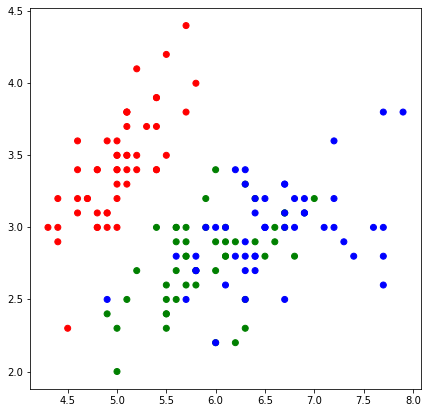

In [5]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [6]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [7]:
def accuracy(y_pred, y):
    counter = 0
    for i in range(len(y)):
        if y_pred[i] == y[i]:
            counter +=1
        counter +=0
    acc = counter/len(y)
    return acc

In [8]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
                    
        for i in range(len(x_train)):
            # Pасчет расстояния от классифицируемого объекта до объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            if distance == 0:
                weight_distance = 1/(1 **(-10))
            else: weight_distance = 1/distance
                            
            # Записываем в список значение расстояния, веса и ответа на объекте обучающей выборки
            test_distances.append([distance, weight_distance, y_train[i]])
                      
                                      
        ## Создаем список соседей по заданной выборке
        K_distances = sorted(test_distances)[0:k]
        
        ##Посчитаем сумму весов расстояний до соседей
        k_total = 0
        for d in K_distances:
            k_total = k_total + d[1]
        k_total
                                         
        # Создаем словарь со всеми возможными классами
        cl = {class_item: 0 for class_item in set(y_train)}
        
        # Посчитаем долю веса расстояний для каждого класса (отношение суммы весов расстояний в классе к сумме весов
        ## расстояний по всем классам)       
        
        summa = 0
        for d in K_distances:
            cl[d[2]] += d[1]/k_total
        cl
            
        # Выбираем класс с максимаьной долей весов от всех весов соседей.
        ## Записываем в список ответов наиболее часто встречающийся класс
        answers.append(max(cl, key=cl.get))
    return answers

In [9]:
y_pred = knn(X_train, y_train, X_test, 6)
y_pred

[0,
 1,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 1,
 0,
 2,
 2,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 0,
 1,
 2]

In [10]:
Acc = accuracy(y_pred, y_test)
Acc

0.9

Теперь сравним с алгоритмом, который не учитывает веса расстояний

In [11]:
def knn_1(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [12]:
y_pred_1 = knn_1(X_train, y_train, X_test, 6)
y_pred_1

[0,
 1,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 1,
 0,
 2,
 2,
 1,
 0,
 2,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 2,
 1,
 0,
 0,
 1,
 2]

In [13]:
Acc_1= accuracy(y_pred_1, y_test)
Acc_1

0.8333333333333334

In [14]:
## Предсказание по количеству соседей определенного класса
def get_graph_1(X_train, y_train, y_test, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn_1(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    y_pred_1 = knn_1(X_train, y_train, X_test, k)
    Acc_1 = accuracy(y_pred_1, y_test)
    
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
     # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}, accuracy = {Acc_1}")
    plt.show()

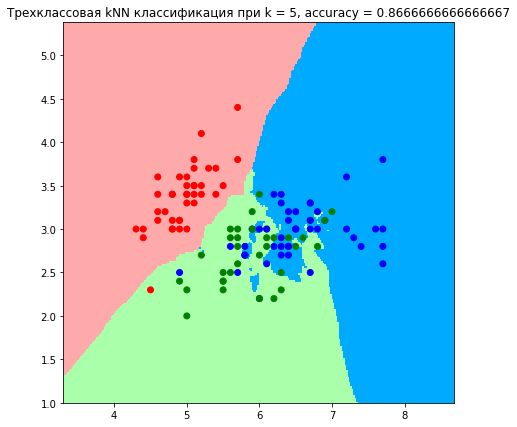

In [15]:
get_graph_1(X_train, y_train, y_test, k =5)

In [95]:
## Предсказание по весу расстояний до соседей определенного класса
def get_graph(X_train, y_train, y_test, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек и точность предсказания
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    y_pred = knn(X_train, y_train, X_test, k)
    Acc = accuracy(y_pred, y_test)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
     # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}, accuracy = {Acc}")
    plt.show()

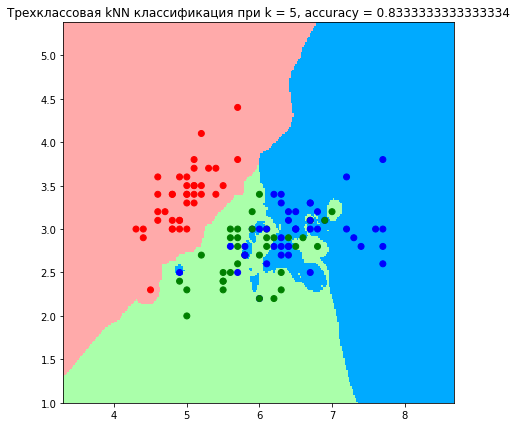

In [91]:
get_graph(X_train, y_train, y_test, k =5)

При количестве соседей до 5 точность предсказания больше у алгоритма с предсказанием по количеству соседей класса
Попробуем увеличить количество соседей k.

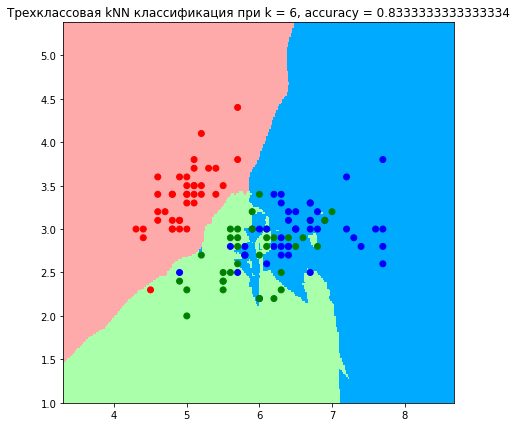

In [92]:
get_graph_1(X_train, y_train, y_test, k =6)

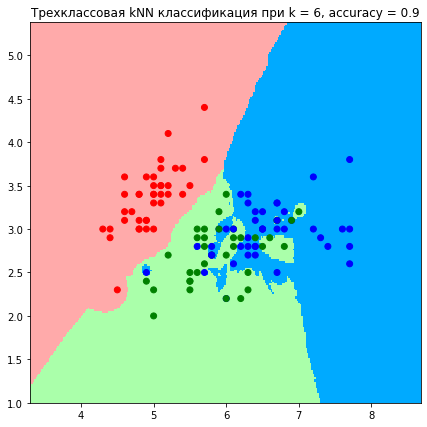

In [97]:
get_graph(X_train, y_train, y_test, k =6)

При количестве соседей 6 точность предсказания больше у алгоритма с предсказанием по весу расстояний до  соседей класса Попробуем увеличить количество соседей k.